In [8]:
#Secret Number inside a box
#classical N bit number can be found in 6 tries
#guess a secret, binary number
#101001
#if you feed the box a guess it will return 0 or 1, true or false

# https://www.youtube.com/watch?v=sqJIpHYl7oo&ab_channel=Qiskit
# 6 tries using AND operations, guessing 1 in each spot


In [11]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [12]:
secret_number = '101001'

In [26]:
circuit = QuantumCircuit(len(secret_number)+1,len(secret_number))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))

#circuit.x(6)
circuit.x(len(secret_number))

#circuit.h(6)
circuit.x(len(secret_number))


circuit.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number))
        
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))


circuit.barrier()

#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secret_number)), range(len(secret_number)))




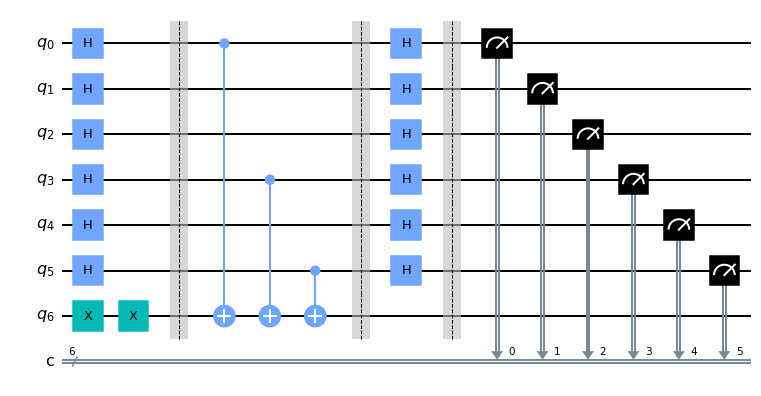

In [27]:
circuit.draw(output = 'mpl')

In [22]:
simulator = Aer.get_backend('qasm_simulator')
result= execute(circuit, backend=simulator, shots=1).result()
counts= result.get_counts()
print(counts)

{'101001': 1}
